# ********Movies Recommendation System Using Cosine Similarity

****Title: Elevating Movie Recommendations through Cosine Similarity**

**Introduction:**
In the digital age, recommendations shape our experiences. Powerhouses like Google, Amazon, and Netflix rely on recommendation systems to personalize our journey. Two methods stand out: Content-Based Filtering, which draws from our history, and Collaborative-Based Filtering, which taps into similar users' choices.

**Cosine Similarity Unveiled:**
Enter cosine similarity—an ingenious measure born from linear algebra. It gauges item similarity by measuring the cosine of angles between projected vectors in a multi-dimensional space. Unlike distance-based metrics, cosine similarity excels when similar items appear distant. It offers precision in connecting seemingly unrelated entities.

**Reimagining Recommendations:**
Our novel movie recommendation system defies the norm. Instead of catering solely to established preferences, we introduce the "Recommendation Rate." This rate surpasses a movie's preference rate for the user. This dynamic pushes users to uncover unconventional gems that resonate deeply, enhancing their cinematic voyage.

**The Power of Unexpected Delights:**
Our approach thrives on the unexpected—the underappreciated films that resonate with discerning viewers. By coupling cosine similarity with the recommendation rate concept, we redefine content discovery. We beckon users to embrace the unexplored and relish the extraordinary.

**Conclusion:**
In a realm where personalization reigns, our movie recommendation system marries innovation with surprise. Through cosine similarity and the allure of the recommendation rate, we celebrate uniqueness and serendipity. Join us in experiencing cinema anew—a journey that celebrates individuality, kindles chance, and amplifies the joy of uncovering.****

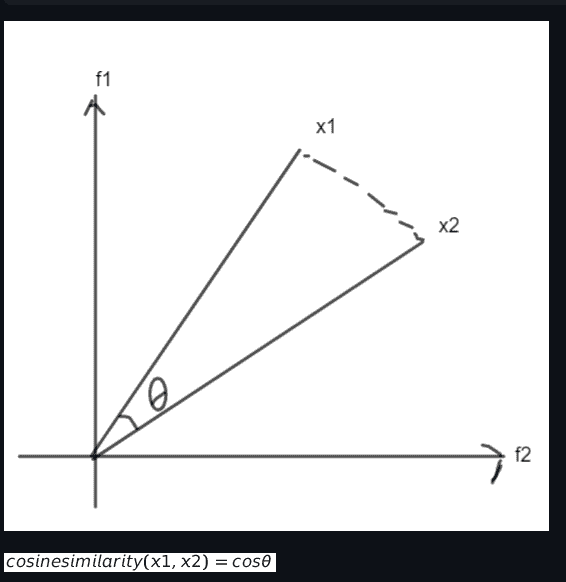

#  **Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Data Collection and Pre-Processing

In [ ]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv("/kaggle/input/movies/movies.csv")




In [ ]:
## printing the first 5 rows of the dataframe
movies_data.head()

In [ ]:
# number of rows and columns in the data frame

movies_data.shape




In [ ]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','director']
print(selected_features)

In [ ]:
# replacing the null valuess with null string

for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [ ]:
print(combined_features)

In [ ]:

# Replace NaN values with empty strings in 'combined_features'
combined_features = combined_features.fillna('')



In [ ]:

# Convert all entries to string data type
combined_features = combined_features.astype(str)



In [ ]:
# Check for any invalid values (e.g., 'nan', 'None', etc.)
invalid_values = combined_features.isin(['nan', 'None'])
if invalid_values.any():
    print("Found invalid values in 'combined_features':")
    print(combined_features[invalid_values])

In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

# Cosine Similarity****

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity.shape)

# Getting the movie name from the user

In [ ]:
# getting the movie name from the user

movie_name = "iron man"

In [ ]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = movies_data['title'].tolist()

print(list_of_all_titles)

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

In [ ]:
close_match = find_close_match[0]
print(close_match)

In [ ]:
# finding the index of the movie with title
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

In [ ]:
# Assuming you have defined the similarity matrix as a 2D array or similar data structure
similarity_matrix = [
    [1.0, 0.8, 0.3],   # Example similarity scores for movie 0
    [0.8, 1.0, 0.5],   # Example similarity scores for movie 1
    [0.3, 0.5, 1.0]    # Example similarity scores for movie 2
]

In [ ]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

In [ ]:
len(similarity_score)

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

# Movie Recommendation Sytem

In [ ]:
movie_name = "iron man"

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

if find_close_match:
    close_match = find_close_match[0]
    index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    print('Movies suggested for you : \n')

    i = 1

    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = movies_data[movies_data.index == index]['title'].values[0]
        if i < 30:
            print(i, '.', title_from_index)
            i += 1

# #checking the result from web search

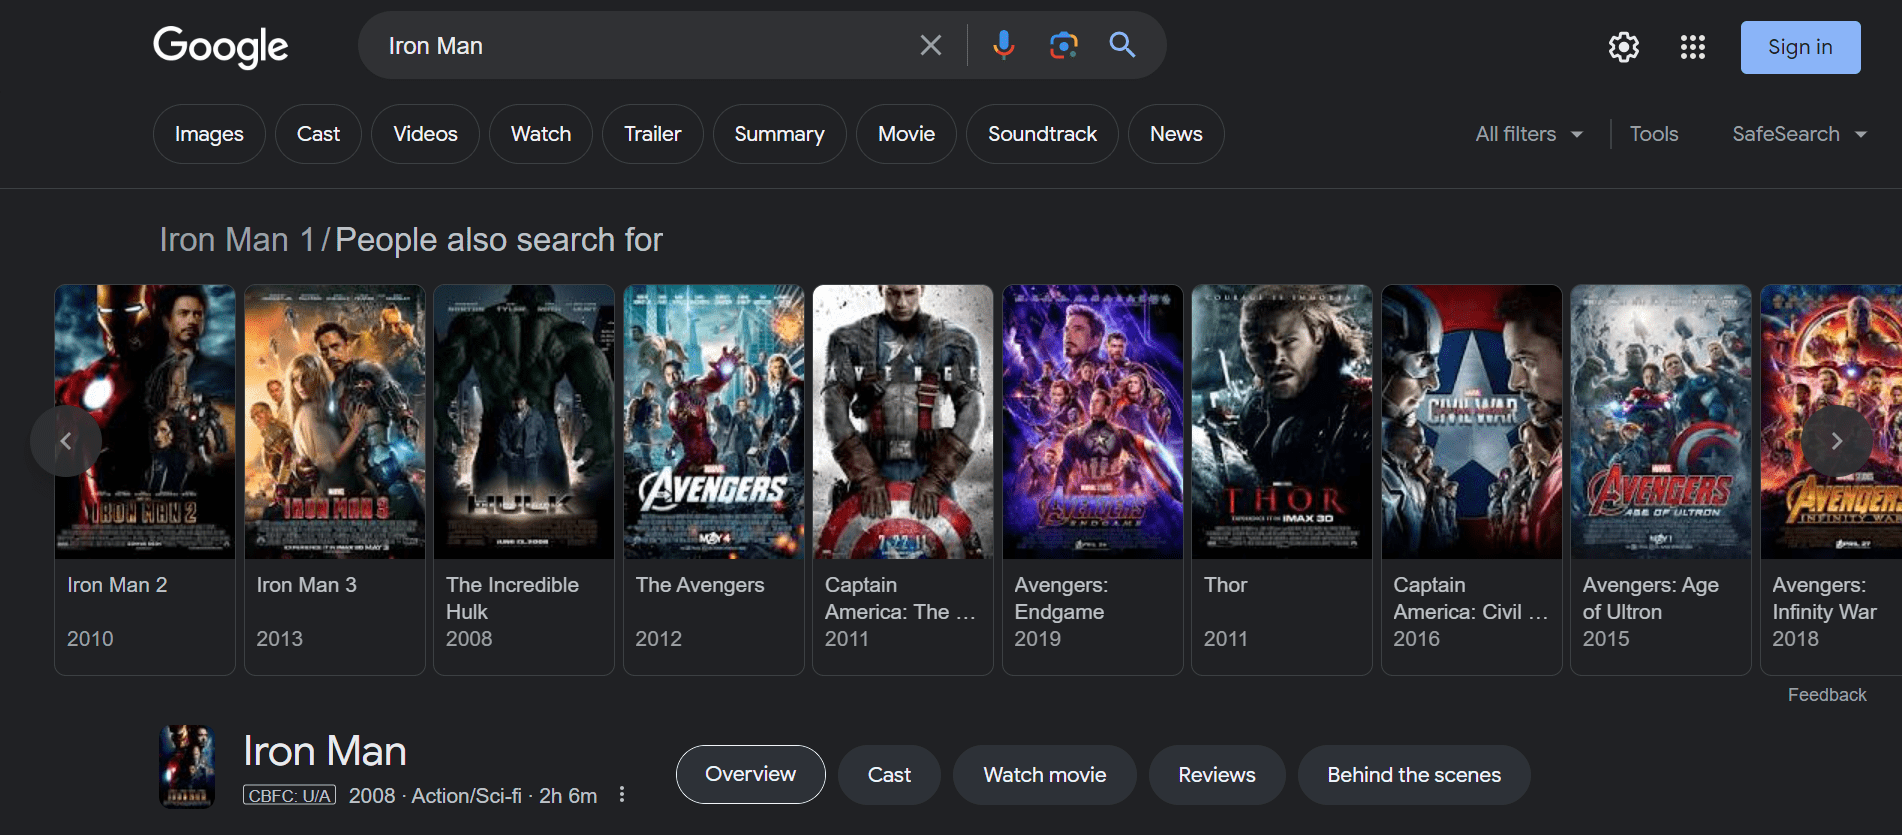